In [41]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from umap import UMAP
from scipy import sparse
import scipy.io as sio
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# THIS WILL CONSUME A LOT OF RAM
# AROUND 100G TO BE EXACT. DO NOT RUN THIS UNLESS YOU HAVE ENOUGH FREE MEMORY!!!
# ligands = pd.read_csv("./full_chembl_ligands.csv")
# ligands

,molecule_chembl_id,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CHEMBL6329,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL6328,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL265667,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL6362,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL267864,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372668,CHEMBL5223032,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2372669,CHEMBL5223033,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2372670,CHEMBL5223034,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2372671,CHEMBL5223035,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
m = sparse.csc_matrix(ligands.iloc[:,1:].values)

In [22]:
sio.mmwrite("./full_chembl_ligands.mtx", m)

In [3]:
ligands = pd.read_csv("./full_chembl_ligands.csv", usecols=[0])

In [6]:
ligands.to_csv("./full_chembl_ligands_ids.csv", index=False)

In [7]:
X = sio.mmread("./full_chembl_ligands.mtx")

In [8]:
svd = TruncatedSVD(n_components=5, random_state=2022024)
svd.fit(X)

TruncatedSVD(n_components=5, random_state=2022024)

In [13]:
svd.explained_variance_ratio_

array([0.01197729, 0.02063271, 0.02048641, 0.01725303, 0.0148554 ])

In [14]:
PCs = svd.fit_transform(X)

In [24]:
pcs_df = pd.DataFrame(PCs)
pcs_df.columns = [f"PC{i+1}" for i in range(len(svd.explained_variance_ratio_))]
pcs_df.insert(0, "chembl_id", ligands)
pcs_df

,chembl_id,PC1,PC2,PC3,PC4,PC5
0,CHEMBL6329,3.305873,-0.875968,0.115215,-0.759710,0.264733
1,CHEMBL6328,2.991857,-0.851485,-0.229808,-0.111640,0.546820
2,CHEMBL265667,2.834742,-0.856553,-0.230803,-0.383769,0.271097
3,CHEMBL6362,2.694220,-0.527879,-0.152677,-0.184681,0.476128
4,CHEMBL267864,3.060392,-1.019903,-0.175764,-0.268650,0.898115
...,...,...,...,...,...,...
2372668,CHEMBL5223032,3.765941,1.589030,-1.854598,1.355439,0.064333
2372669,CHEMBL5223033,2.933364,2.047280,-0.084719,0.892126,0.300739
2372670,CHEMBL5223034,2.975605,2.130004,-0.146556,1.062209,0.254610
2372671,CHEMBL5223035,2.470498,0.066316,0.845696,-0.310847,0.995446


In [21]:
ligands_metadata = pd.read_csv("../compounds_with_ids.csv")
ligands_metadata

,molecule_chembl_id,alogp,aromatic_rings,cx_logd,cx_logp,cx_most_apka,cx_most_bpka,full_molformula,full_mwt,hba,...,mw_freebase,mw_monoisotopic,np_likeness_score,num_lipinski_ro5_violations,num_ro5_violations,psa,qed_weighted,ro3_pass,rtb,canonical_smiles
0,CHEMBL6329,2.11,3.0,2.69,3.63,6.48,NaN,C17H12ClN3O3,341.75,5.0,...,341.75,341.0567,-1.56,0.0,0.0,84.82,0.74,N,3.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl
1,CHEMBL6328,1.33,3.0,1.82,2.88,6.33,NaN,C18H12N4O3,332.32,6.0,...,332.32,332.0909,-1.59,0.0,0.0,108.61,0.73,N,3.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1
2,CHEMBL265667,2.27,3.0,2.64,3.70,6.33,NaN,C18H16ClN3O3,357.80,5.0,...,357.80,357.0880,-0.82,0.0,0.0,87.98,0.75,N,3.0,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1
3,CHEMBL6362,1.46,3.0,1.97,3.02,6.33,NaN,C17H13N3O3,307.31,5.0,...,307.31,307.0957,-1.10,0.0,0.0,84.82,0.74,N,3.0,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1
4,CHEMBL267864,2.11,3.0,2.57,3.63,6.33,NaN,C17H12ClN3O3,341.75,5.0,...,341.75,341.0567,-1.49,0.0,0.0,84.82,0.74,N,3.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372669,CHEMBL5223033,NaN,NaN,NaN,NaN,NaN,NaN,C62H89N3O15S2+2,1180.53,NaN,...,1180.53,1179.5724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO[C@@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C...
2372670,CHEMBL5223034,0.78,0.0,-1.78,-0.49,-1.05,NaN,C22H37N3O8S,503.62,7.0,...,503.62,503.2301,0.48,2.0,1.0,171.13,0.26,N,11.0,CC(C)C[C@H](NC(=O)OCC1CC2CCC1C2)C(=O)N[C@@H](C...
2372671,CHEMBL5223035,1.95,0.0,-0.85,0.44,-1.05,NaN,C26H43N3O8S,557.71,7.0,...,557.71,557.2771,0.35,2.0,1.0,171.13,0.23,N,12.0,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...
2372672,CHEMBL5223036,0.16,3.0,-3.88,-0.39,NaN,9.46,C18H20N6O2,352.40,6.0,...,352.40,352.1648,-0.53,1.0,0.0,136.02,0.47,N,6.0,NCCNC(=O)c1ccc2ccc3ccc(C(=O)NCCN)nc3c2n1


In [27]:
pcs_df = pd.merge(pcs_df, ligands_metadata, left_on="chembl_id", right_on="molecule_chembl_id")

In [53]:
pcs_df.columns = [
    "chembl_id",
    "PC1",
    "PC2",
    "PC3",
    "PC4",
    "PC5",
    "molecule_chembl_id",
    "AlogP",
    "Aromatic Rings",
    "cx_logd",
    "cx_logp",
    "cx_most_apka",
    "cx_most_bpka",
    "full_molformula",
    "Full Molecular Weight",
    "Hydrogen bond acceptors",
    "hba_lipinski",
    "Hydrogen bond donors",
    "hbd_lipinski",
    "Heavy Atoms",
    "Molecular Species",
    "mw_freebase",
    "mw_monoisotopic",
    "np_likeness_score",
    "Number of Lipinski's rule violations",
    "Number of Rule of 5 violations",
    "Polar Surface Area",
    "QED Weighted",
    "ro3_pass",
    "rtb",
    "canonical_smiles",
]

In [54]:
pcs_df

,chembl_id,PC1,PC2,PC3,PC4,PC5,molecule_chembl_id,AlogP,Aromatic Rings,cx_logd,...,mw_freebase,mw_monoisotopic,np_likeness_score,Number of Lipinski's rule violations,Number of Rule of 5 violations,Polar Surface Area,QED Weighted,ro3_pass,rtb,canonical_smiles
0,CHEMBL6329,3.305873,-0.875968,0.115215,-0.759710,0.264733,CHEMBL6329,2.11,3.0,2.69,...,341.75,341.0567,-1.56,0.0,0.0,84.82,0.74,N,3.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl
1,CHEMBL6328,2.991857,-0.851485,-0.229808,-0.111640,0.546820,CHEMBL6328,1.33,3.0,1.82,...,332.32,332.0909,-1.59,0.0,0.0,108.61,0.73,N,3.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1
2,CHEMBL265667,2.834742,-0.856553,-0.230803,-0.383769,0.271097,CHEMBL265667,2.27,3.0,2.64,...,357.80,357.0880,-0.82,0.0,0.0,87.98,0.75,N,3.0,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1
3,CHEMBL6362,2.694220,-0.527879,-0.152677,-0.184681,0.476128,CHEMBL6362,1.46,3.0,1.97,...,307.31,307.0957,-1.10,0.0,0.0,84.82,0.74,N,3.0,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1
4,CHEMBL267864,3.060392,-1.019903,-0.175764,-0.268650,0.898115,CHEMBL267864,2.11,3.0,2.57,...,341.75,341.0567,-1.49,0.0,0.0,84.82,0.74,N,3.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372668,CHEMBL5223032,3.765941,1.589030,-1.854598,1.355439,0.064333,CHEMBL5223032,0.88,3.0,-4.05,...,324.43,324.2062,-0.47,1.0,0.0,101.88,0.36,N,8.0,NCCNCc1ccc2ccc3ccc(CNCCN)nc3c2n1
2372669,CHEMBL5223033,2.933364,2.047280,-0.084719,0.892126,0.300739,CHEMBL5223033,NaN,NaN,NaN,...,1180.53,1179.5724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CO[C@@H]1C[C@@H]2CC[C@@H](C)[C@@](O)(O2)C(=O)C...
2372670,CHEMBL5223034,2.975605,2.130004,-0.146556,1.062209,0.254610,CHEMBL5223034,0.78,0.0,-1.78,...,503.62,503.2301,0.48,2.0,1.0,171.13,0.26,N,11.0,CC(C)C[C@H](NC(=O)OCC1CC2CCC1C2)C(=O)N[C@@H](C...
2372671,CHEMBL5223035,2.470498,0.066316,0.845696,-0.310847,0.995446,CHEMBL5223035,1.95,0.0,-0.85,...,557.71,557.2771,0.35,2.0,1.0,171.13,0.23,N,12.0,CC(C)C[C@H](NC(=O)OCCC12CC3CC(CC(C3)C1)C2)C(=O...


<Axes: xlabel='PC1', ylabel='PC2'>

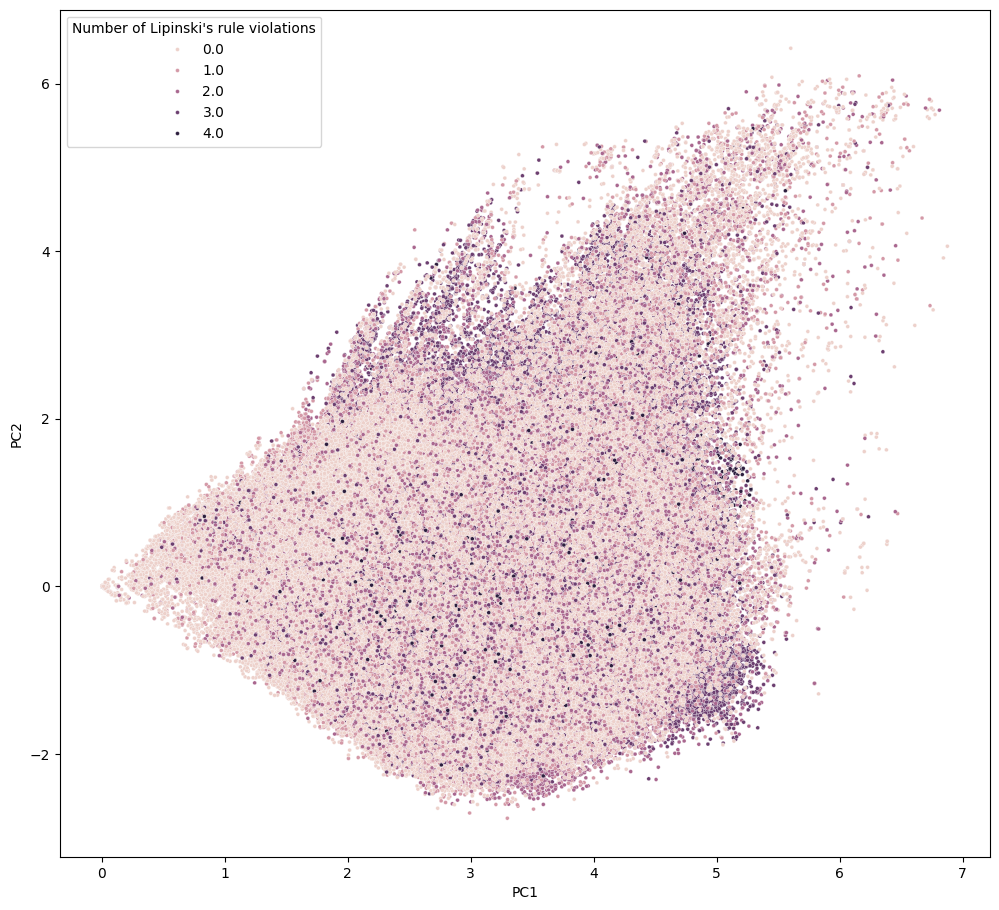

In [56]:
plt.figure(figsize=(12,11))
sns.scatterplot(data=pcs_df, x="PC1", y="PC2", hue="Number of Lipinski's rule violations", s=8)

<Axes: xlabel='PC2', ylabel='PC3'>

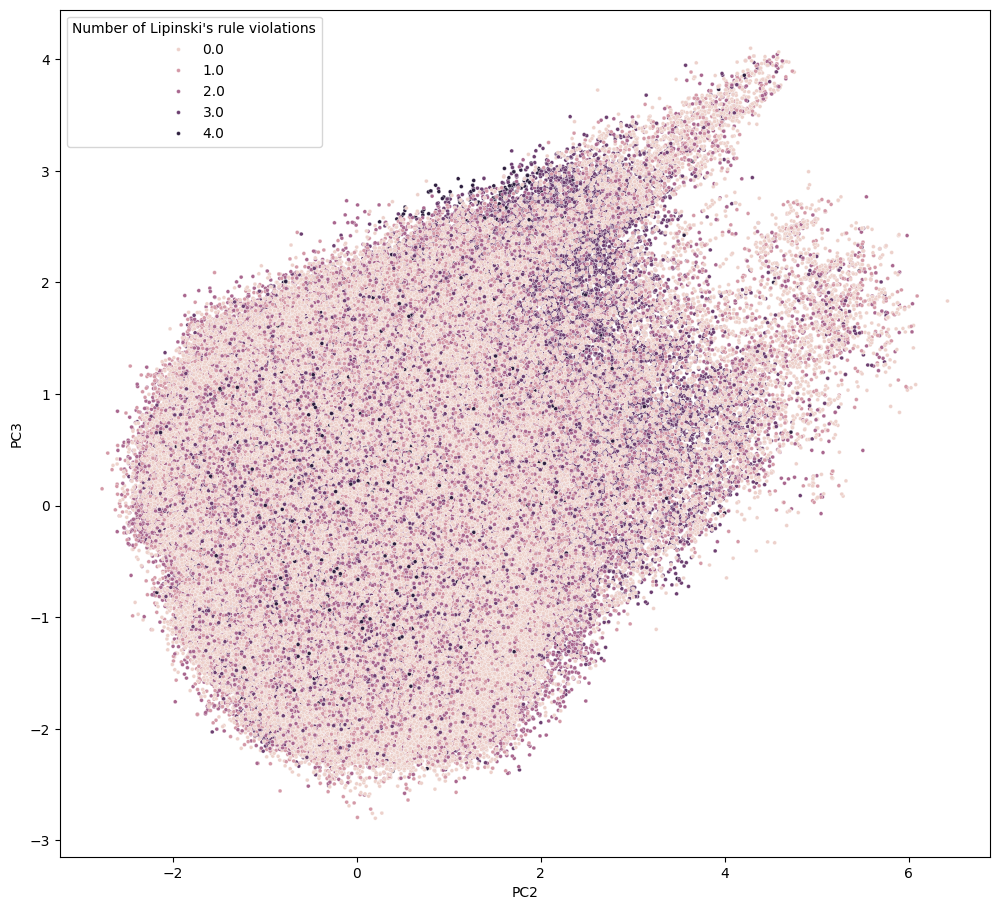

In [57]:
plt.figure(figsize=(12,11))
sns.scatterplot(data=pcs_df, x="PC2", y="PC3", hue="Number of Lipinski's rule violations", s=8)

<Axes: xlabel='PC2', ylabel='PC3'>

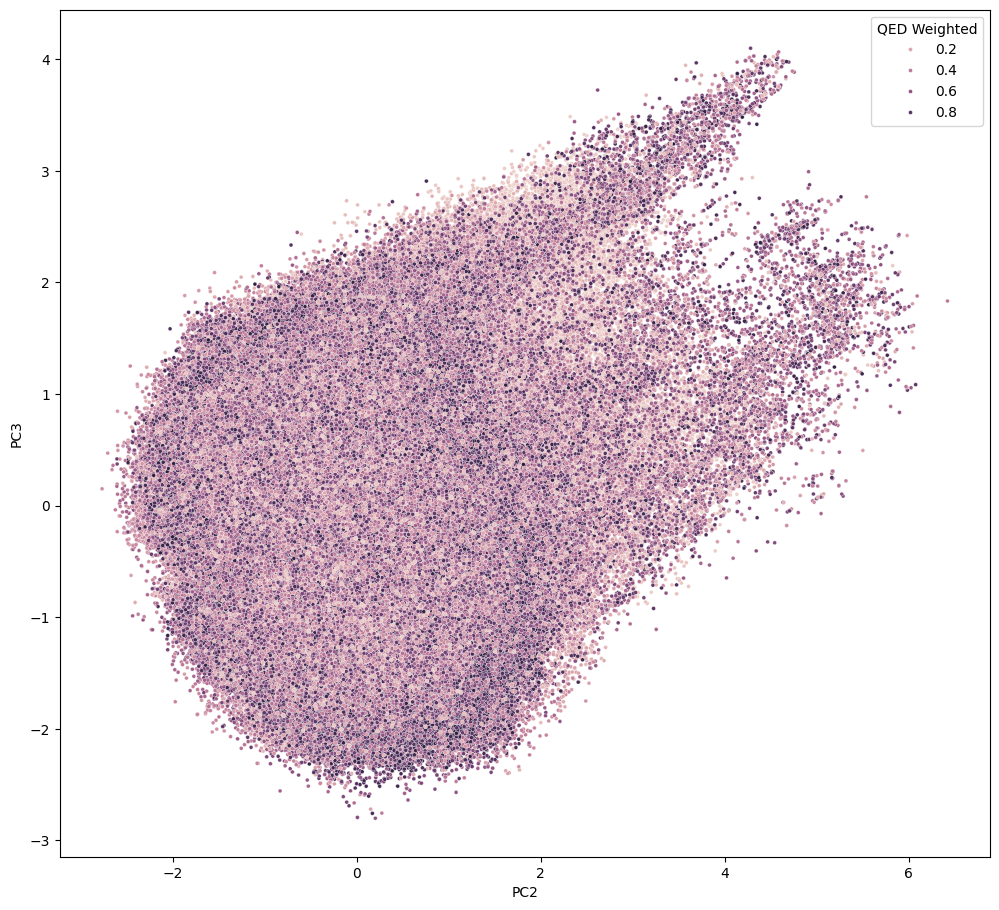

In [58]:
plt.figure(figsize=(12,11))
sns.scatterplot(data=pcs_df, x="PC2", y="PC3", hue="QED Weighted", s=8)

In [62]:
mapper = UMAP(random_state=2022024, n_jobs=16).fit(X)

/home/jbryska/ipz/venv/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value 16 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/jbryska/ipz/venv/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/jbryska/ipz/venv/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


KeyboardInterrupt: 